<a href="https://colab.research.google.com/github/nyjinnn/images/blob/main/220708_%EB%AF%B8%EB%8B%88%EB%B0%B0%EC%B9%98_Chapter6_%EC%88%98%EC%97%85%EC%9E%90%EB%A3%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀 + 데이터 전처리

## 문제 해결을 위한 데이터셋 준비

1. 필요한 패키기 불러오기


In [3]:
import random
import torch 
import torch.nn as nn 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

2. 데이터셋 불러오기

In [4]:
cancer = load_breast_cancer()
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


3. 데이터 확인하기 

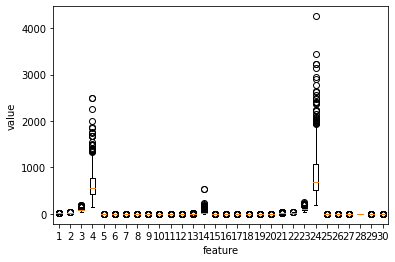

In [5]:
plt.boxplot(cancer.data)
plt.xlabel("feature")
plt.ylabel("value")
plt.show()

4. 데이터 분포 확인하기 

4번째 feature에 대한 분포

평균 :  654.8891036906855
표준편차 :  351.60475406323


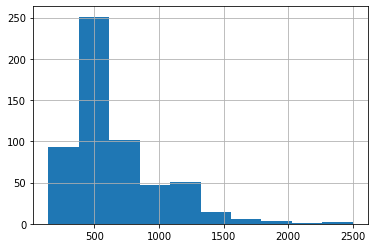

In [6]:
plt.hist(cancer.data[:, 3])
plt.grid()
print("평균 : ", np.mean(cancer.data[:, 3]))
print("표준편차 : ", np.std(cancer.data[:, 3]))

24번째 feature에 대한 분포 

평균 :  880.5831282952548
표준편차 :  568.8564589532671


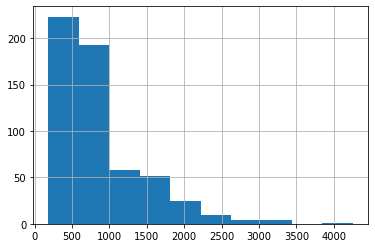

In [7]:
plt.hist(cancer.data[:, 23])
plt.grid()
print("평균 : ", np.mean(cancer.data[:, 23]))
print("표준편차 : ", np.std(cancer.data[:, 23]))

5. 데이터 스케일링 1 - zero mean unit variance (평균은 0, 분산는 1로 만들어주는 방법)

In [8]:
x = cancer.data
y = cancer.target 

In [9]:
print("평균 : ", np.mean(x[:, 3]))
print("표준편차 : ", np.std(x[:, 3]))
scaled_feature_0 = (x[:, 3] - np.mean(x[:, 3])) / np.std(x[:, 3])
print("수정 평균 : ", np.mean(scaled_feature_0))
print("수정 표준편차 : ", np.std(scaled_feature_0))

평균 :  654.8891036906855
표준편차 :  351.60475406323
수정 평균 :  -2.1853247584888846e-16
수정 표준편차 :  1.0


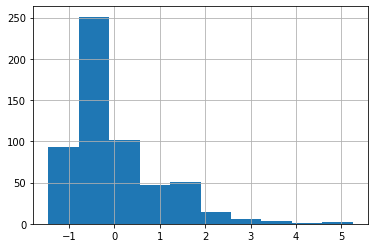

In [10]:
plt.hist(scaled_feature_0)
plt.grid()

mean_x :  (30,)
mean_x :  (1, 30)


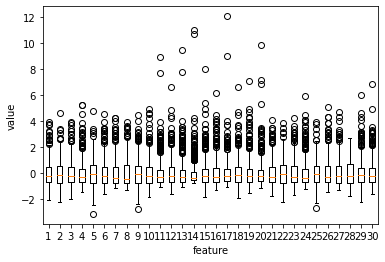

In [11]:
# 모든 데이터를 한 번에 처리 
mean_x = np.mean(cancer.data, 0)
print("mean_x : ", np.shape(mean_x))  # 차원이 하나 줄었음
mean_x = np.expand_dims(mean_x, 0)
print("mean_x : ", np.shape(mean_x))  # 차원을 하나 늘림 

std_x = np.std(cancer.data, 0)
std_x = np.expand_dims(std_x, 0) 

x_scale1 = (cancer.data - mean_x) / std_x

plt.boxplot(x_scale1)
plt.xlabel("feature")
plt.ylabel("value")
plt.show()

6. 데이터 스케일링 2 - min max scaler (최댓값이 1, 최솟값이 0)




In [12]:
print("최댓값 : ", np.max(x[:, 0]))
print("최솟값 : ", np.min(x[:, 0]))
scaled_feature_0 = (x[:, 0] - np.min(x[:, 0])) / (np.max(x[:, 0])-np.min(x[:, 0]))
print("수정 최댓값 : ", np.max(scaled_feature_0))
print("수정 최솟값 : ", np.min(scaled_feature_0))

최댓값 :  28.11
최솟값 :  6.981
수정 최댓값 :  1.0
수정 최솟값 :  0.0


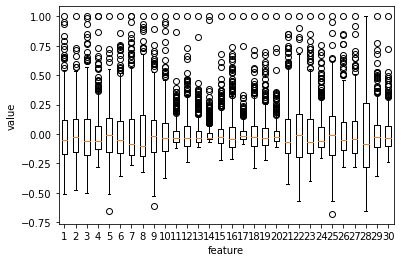

In [13]:
# 모든 데이터를 한 번에 처리 
max_x = np.max(cancer.data, 0)
min_x = np.min(mean_x, 0)

x_scale2 = (cancer.data - min_x) / (max_x - min_x)

plt.boxplot(x_scale2)
plt.xlabel("feature")
plt.ylabel("value")
plt.show()

7. 학습 데이터셋 준비

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)  # 수정 금지 
x_train, x_eval, y_train, y_eval = train_test_split(x_train, y_train, stratify=y_train, test_size=0.125, random_state=999)

# train에 대해서 평균과 표준편차를 구한다. sigma  x -min
mean_x = np.mean(x_train, 0)
mean_x = np.expand_dims(mean_x, 0)

std_x = np.std(x_train, 0)
std_x = np.expand_dims(std_x, 0) 

x_train_1 = (x_train - mean_x) / std_x
x_test_1 = (x_test - mean_x) / std_x
x_eval_1 = (x_eval - mean_x) / std_x

# train에 대해서 최댓값과 최솟값을 구한다.  minmax scaler
max_x = np.max(x_train, 0)
min_x = np.min(x_train, 0)

x_train_2 = (x_train - min_x) / (max_x - min_x)
x_test_2 = (x_test - min_x) / (max_x - min_x)
x_eval_2 = (x_eval - min_x) / (max_x - min_x)

In [15]:
x_train_torch = torch.FloatTensor(x_train)
y_train_torch = torch.FloatTensor(y_train)
x_eval_torch = torch.FloatTensor(x_eval)
y_eval_torch = torch.FloatTensor(y_eval) 
x_test_torch = torch.FloatTensor(x_test)
y_test_torch = torch.FloatTensor(y_test)

x_train_1_torch = torch.FloatTensor(x_train_1)
x_test_1_torch = torch.FloatTensor(x_test_1)
x_eval_1_torch = torch.FloatTensor(x_eval_1)

x_train_2_torch = torch.FloatTensor(x_train_2)
x_test_2_torch = torch.FloatTensor(x_test_2)
x_eval_2_torch = torch.FloatTensor(x_eval_2)

8. 모델 준비

In [24]:
class LogisticNeuron(nn.Module):
  def __init__(self, in_dim=30, n_hidden=60, learning_rate=1e-4):
    '''
    Args:
      in_dim: The dimension of input data  
      n_hidden: The dimension of hidden layer
      learning_rate: The initial learning rate for training a network 
    '''
    super().__init__()

    self.model = nn.Sequential(
        nn.Linear(in_dim, n_hidden),
        nn.ReLU(), 
        nn.Linear(n_hidden, 1),
        nn.Sigmoid()
        )
    
    self.optim = torch.optim.Adam(self.model.parameters(), lr=learning_rate)
    self.criterion = nn.BCELoss()

  def _calculate_loss(self, x, y):
    loss = self.criterion(x, y)
    return loss 

  def forward(self, x):
    z = self.model(x)
    return z

  def train(self, x, y, x_eval, batch_size=4, epochs=10):
    #step 1 : 데이터의 갯수를 구한다. 
    len_data = x.size(0) #or len(x)'

    #step 2 : bin수를 구한다. (step size)
    bins = len_data // batch_size
    if len_data%batch_size !=0 :
      bins = bins+1

    #steo 3 : 인덱스를 구한다.
    index =np.random.permutation(len_data)

    #step 4 : 데이터를 섞는다.
    tmp_x = x[index]
    tmp_y = y[index]

    
    for i in range(epochs):
      #step 5 : 배치로 학습
      for idx in range(bins) :
        start = batch_size *idx
        end = batch_size * (idx+1)

        batch_x = tmp_x[start:end,:]
        batch_y = tmp_y[start:end,:] #true_y
        #n(end - start)= batch_size


        pred_y = self.forward(batch_x) #shape (4,1)이 나올 것임...
        pred_y = pred_y.squeeze(1)      #shape (4,)이 나올 것임...
        true_y=batch_y                 #shape (4,)이 나올 것임...

        loss = self._calculate_loss(pred_y, y)

       

      for x_i, y_i in zip(x, y):
        pred_y = self.forward(x_i)
        loss = self._calculate_loss(pred_y[0], y_i)
        self.model.zero_grad()  #모델의 각 weight에 있는 gradient 값 삭제
        self.optim.zero_grad()
        loss.backward() #gradient를 계산
        self.optim.step() #gradient를 적용

      if (i+1) % 10 == 0:  # 여기 나누는 값을 조정해서 프린트하는 횟수를 조절
        acc = np.mean(self.predict(x_eval) == y_eval)
        # if tmp_acc == -1: 
        #   tmp_acc = acc 
        # if tmp_acc > acc:
        #   break
        print("epoch {} : err = {:.4f}, eval acc = {:%}".format(i + 1, loss, acc))

  def predict(self, x):
    pred = [self.forward(x_i).data.numpy()[0] for x_i in x]
    return np.array(pred) > 0.5 

9. 원래 데이터셋 결과 

In [26]:
random_seed = 123
np.random.seed(random_seed)
torch.manual_seed(random_seed)
random.seed(random_seed)

neuron = LogisticNeuron(n_hidden=100, learning_rate=1e-4)
neuron.train(x_train_torch, y_train_torch, x_eval_torch, batch_size=4,100)

result = np.mean(neuron.predict(x_test_torch) == y_test)
print("정확도 : {:%}".format(result))



#batch_size가 늘어나면 스텝 수가 줄어들기 때문에, 스텝 수를 더 늘려도 된다.
#배치에 따라 학습에 영향

NameError: ignored

10. Zero mean Unit variance Dataset

In [ ]:
random_seed = 123
np.random.seed(random_seed)
torch.manual_seed(random_seed)
random.seed(random_seed)

neuron1 = LogisticNeuron(n_hidden=100, learning_rate=1e-4)
neuron1.train(x_train_1_torch, y_train_torch, x_eval_1_torch, 100)

result = np.mean(neuron1.predict(x_test_1_torch) == y_test)
print("정확도 : {:%}".format(result))

In [ ]:
random_seed = 123
np.random.seed(random_seed)
torch.manual_seed(random_seed)
random.seed(random_seed)

neuron2 = LogisticNeuron(n_hidden=100, learning_rate=1e-4)
neuron2.train(x_train_2_torch, y_train_torch, x_eval_2_torch, 100)

result = np.mean(neuron2.predict(x_test_2_torch) == y_test)
print("정확도 : {:%}".format(result))

In [ ]:
x_train_torch.size()

In [ ]:
!pip install torchsummary
from torchsummary import summary as summary
summary(neuron, (398, 30))